In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline

In [2]:
'''
Data links: 
S&P 500: https://www.kaggle.com/kp4920/s-p-500-stock-data-time-series-analysis
Yahoo S&P: https://finance.yahoo.com/quote/%5EGSPC/history/ 
'''
#Import the csv
data = pd.read_csv("all_stocks_5yr.csv", index_col = 'date', parse_dates=["date"])
sp_data = pd.read_csv("SP500.csv", index_col = 'Date', parse_dates=["Date"])

In [3]:
data.head()

open   high    low  close    volume Name
date                                                 
2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

In [4]:
data.tail()

open   high    low  close   volume Name
date                                                
2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS
2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS
2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS
2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS
2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS

In [5]:
data.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
data.shape

(619040, 6)

In [7]:
#Check for missing stock data:
missing_data = data.isnull().sum()
missing_data

open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [8]:
data.groupby('Name').min()

open      high       low     close    volume
Name                                                  
A      33.1800   34.0600   33.1150   33.3700    532863
AAL    13.1400   13.4200   12.7000   13.0200   1352400
AAP    76.0400   76.6600   75.6230   76.1800    130712
AAPL   55.4242   57.0857   55.0142   55.7899  11475922
ABBV   35.0500   35.5700   35.0100   35.2700   1747000
ABC    46.3800   46.6200   46.0800   46.1800    393279
ABT    33.0100   33.3900   32.7000   32.9300   1462895
ACN    70.5800   70.7500   69.0000   70.2800    601818
ADBE   38.1400   38.6600   38.0900   38.1100    602505
ADI    42.2000   42.6900   41.8100   42.3400    536315
ADM    30.2200   30.4450   29.8600   30.2200    722686
ADP    60.2400   60.5700   60.0000   60.2700    488812
ADS   152.2700  152.6180  151.4000  152.0500     94859
ADSK   33.3100   33.6800   33.0050   33.4800    355479
AEE    32.6500   32.7900   32.3400   32.6100    345780
AEP    42.1000   42.3400   41.8300   41.9200    602415
AES     8.6000    8.6500    8.2200    8.5400   1213181
AET    46.5400   46.9400   46.0450   46.5600    536797
AFL    48.4300   48.9300   48.1724   48.6500    594374
AGN    82.7000   83.9500   82.0200   83.1000    351222
AIG    37.0700   37.6100   36.6800   37.0600   1744091
AIV    24.8800   25.1400   24.7800   25.0000    221812
AIZ    38.5000   38.7400   38.0900   38.4800    104852
AJG    36.5300   37.1700   35.9634   36.2400    154513
AKAM   32.7200   33.7000   32.6350   33.5500    353632
ALB    41.5200   42.2300   41.3700   41.7800    200210
ALGN   29.5600   30.9500   29.5300   30.1300    141232
ALK    23.9950   24.4350   23.9400   24.3350    387174
ALL    45.0300   45.2900   44.8900   45.1400    567802
ALLE   40.7000   41.0600   40.2400   40.7000    114249
...        ...       ...       ...       ...       ...
VRTX   44.4400   45.1100   43.6912   44.1800    340914
VTR    48.7500   49.5700   46.8700   48.4300    598361
VZ     42.5500   42.9000   38.0600   42.8400   4108274
WAT    88.4400   88.8900   87.8500   88.2400    103926
WBA    40.0200   40.3000   39.7400   39.9600   1366994
WDC    35.4200   35.8500   34.9900   35.4400    533669
WEC    39.3700   39.8300   39.0400   39.1800    486449
WFC    34.6900   34.9150   34.5200   34.7500   4296992
WHR   106.7200  107.2500  104.0600  106.4700    173089
WLTW  105.6300  109.2550  104.1100  107.1300    216639
WM     35.9900   36.3355   35.5000   36.3000    529248
WMB    11.2600   12.1500   10.2200   11.1600   1869027
WMT    56.3900   57.0600   56.3000   56.4200   2094937
WRK    30.3800   31.0900   29.7300   29.9400       100
WU     13.8500   14.0500   13.8000   13.8200   1013121
WY     22.3500   22.5300   22.0600   22.2200    709620
WYN    54.3700   55.1900   52.8400   54.8500    225679
WYNN   52.7600   52.9900   49.9500   51.5000    436994
XEC    64.2800   65.2300   62.9800   63.6700    301520
XEL    27.0300   27.2900   26.9000   27.1000    898884
XL     27.9600   28.1500    5.4000   27.9600    389148
XLNX   35.6200   35.9000   34.9800   35.5100    426684
XOM    67.9900   71.3800   66.5500   68.7100   3851283
XRAY   40.5500   40.6500   39.9000   40.2400    241202
XRX    26.1200   27.8400   25.8400   27.5200    411994
XYL    24.2000   24.4800   23.6100   24.1900    195883
YUM    59.8900   60.2500   59.5700   59.7000    666705
ZBH    72.5900   73.3500   72.2400   72.3800    233450
ZION   20.1000   20.2300   19.6500   19.9000    425729
ZTS    28.4800   28.5700   28.1350   28.4000    438632

[505 rows x 5 columns]

In [9]:
data.groupby('Name').max()

open     high       low   close     volume
Name                                              
A      74.48   75.000   74.3000   74.82   18146408
AAL    58.79   59.080   57.8000   58.47  137767165
AAP   201.24  201.240  198.1600  200.38   19749515
AAPL  179.37  180.100  178.2500  179.26  266833581
ABBV  121.50  125.860  118.9800  123.21  122740856
ABC   117.39  120.680  114.7500  115.48   17071639
ABT    63.18   64.600   62.8500   63.42   54527662
ACN   162.33  162.600  160.9700  162.55   28284386
ADBE  202.29  204.450  199.4400  201.30   16424002
ADI    97.64   98.380   96.1400   97.24   14962962
ADM    53.38   53.910   53.2000   53.71   15805985
ADP   122.70  125.240  121.5500  123.63   29837591
ADS   309.93  312.000  305.9421  309.91    5801673
ADSK  130.76  131.100  129.2600  130.24   19486960
AEE    64.67   64.890   63.9300   64.54    7029263
AEP    77.78   78.070   77.1700   77.63   12944176
AES    15.57   15.650   15.4100   15.57   46067618
AET   192.96  194.400  192.5600  193.74   23978404
AFL    91.20   91.730   90.8910   91.69   13794624
AGN   337.08  340.340  335.0600  339.50   36591279
AIG    66.84   67.470   66.4200   67.20   51737675
AIV    47.82   47.910   47.0800   47.59    8304107
AIZ   106.90  106.985  105.8300  106.27    3033227
AJG    70.21   70.550   69.5800   70.49   37176922
AKAM   78.20   78.440   77.5000   78.36   21769246
ALB   143.53  144.990  142.5000  144.58   24895474
ALGN  284.45  287.320  273.2700  283.97   17940259
ALK    99.91  101.430   98.0400  100.24   27347093
ALL   105.08  105.360  104.6900  104.91   13214958
ALLE   89.81   89.810   88.1900   89.56    5130708
...      ...      ...       ...     ...        ...
VRTX  174.11  174.955  166.4171  172.99   42250355
VTR    83.01   84.108   82.3900   82.93   11606348
VZ     56.32   56.950   56.3200   56.53  618237630
WAT   218.50  220.200  217.5700  218.70    3184613
WBA    97.03   97.300   96.2900   96.68   84138863
WDC   114.39  114.690  113.2800  114.28   19380444
WEC    69.62   70.090   69.1100   69.53   10635560
WFC    65.89   66.310   65.6600   65.93  103394442
WHR   215.25  217.110  212.7000  215.00    9479958
WLTW  164.43  165.000  162.7600  164.02    7654178
WM     89.27   89.730   88.5700   89.71    8638437
WMB    60.84   61.380   59.0600   60.86  105692958
WMT   109.14  109.980  107.9900  109.55   80898117
WRK    70.40   71.550   69.1600   70.27    8386684
WU     22.60   22.840   22.4900   22.57   55177204
WY     37.88   37.890   37.3800   37.85   57594697
WYN   127.73  127.960  126.5000  127.35    6686763
WYNN  248.99  249.310  247.0000  247.95   25903548
XEC   148.92  150.710  147.4200  148.77   13588698
XEL    51.97   52.220   51.1800   51.80   11937649
XL     47.10   47.270   46.2800   46.66   22101716
XLNX   77.00   77.260   75.8700   76.30   33031356
XOM   104.42  104.760  103.9500  104.38   44704931
XRAY   68.55   68.980   68.2900   68.58   19284507
XRX    57.44   57.440   56.6000   57.28   17964257
XYL    75.22   76.810   74.6500   75.66   10022418
YUM    94.95   95.900   94.1500   94.88   36795550
ZBH   132.51  133.490  131.9000  133.09   12394537
ZION   54.77   55.610   53.9800   54.98   15681067
ZTS    79.81   80.130   79.3800   80.09   39627562

[505 rows x 5 columns]

In [10]:
data.groupby('Name').mean()

open        high         low       close        volume
Name                                                              
A      49.187863   49.600059   48.782026   49.202025  2.338039e+06
AAL    38.390495   38.955554   37.825605   38.393252  9.390321e+06
AAP   132.439631  133.818297  131.036025  132.433463  1.078043e+06
AAPL  109.055429  109.951118  108.141589  109.066698  5.404790e+07
ABBV   60.802801   61.474133   60.177275   60.864440  7.870683e+06
ABC    82.066430   82.781774   81.349889   82.092979  2.005738e+06
ABT    42.924758   43.258710   42.601019   42.940326  6.964037e+06
ACN   101.022826  101.766440  100.348163  101.119079  2.596238e+06
ADBE   90.387609   91.189876   89.578621   90.458156  2.998134e+06
ADI    60.928583   61.470247   60.341293   60.931932  2.451738e+06
ADM    42.379519   42.762706   42.019370   42.402113  3.647858e+06
ADP    86.960322   87.552852   86.349654   87.009401  2.022774e+06
ADS   241.007335  243.467999  238.461493  241.044051  6.193085e+05
ADSK   64.138877   64.874703   63.417575   64.194336  2.482751e+06
AEE    44.974623   45.320558   44.637595   45.002939  1.622724e+06
AEP    58.440306   58.860155   58.021687   58.466140  2.781243e+06
AES    12.337340   12.470019   12.202694   12.340048  5.568656e+06
AET   104.756358  105.799285  103.782937  104.821712  2.716448e+06
AFL    66.089162   66.540929   65.669060   66.122387  2.116352e+06
AGN   222.401175  224.956186  219.645439  222.261033  2.880077e+06
AIG    55.692427   56.128224   55.265439   55.706545  8.419467e+06
AIV    37.474861   37.792993   37.153441   37.490659  1.198721e+06
AIZ    75.361684   75.986908   74.787455   75.402272  5.451393e+05
AJG    48.610433   48.920560   48.291752   48.625417  9.244311e+05
AKAM   56.606090   57.218039   56.009504   56.625419  2.182469e+06
ALB    75.366855   76.129080   74.576579   75.361783  1.160882e+06
ALGN   83.626938   84.665594   82.524616   83.664518  8.855518e+05
ALK    61.763858   62.526951   60.971666   61.767065  1.537616e+06
ALL    67.193684   67.625835   66.801532   67.228483  2.407103e+06
ALLE   64.166778   64.740003   63.578252   64.182112  7.397245e+05
...          ...         ...         ...         ...           ...
VRTX  101.599640  103.230255   99.865167  101.611135  1.859520e+06
VTR    65.051553   65.584284   64.464564   65.037832  2.116031e+06
VZ     49.001850   49.325505   48.649351   49.008095  1.609307e+07
WAT   131.254765  132.299322  130.201625  131.316835  5.003796e+05
WBA    73.066771   73.749932   72.381373   73.092002  5.432793e+06
WDC    75.958892   76.923652   74.956465   75.954726  3.363798e+06
WEC    52.295683   52.687828   51.907045   52.323340  1.775573e+06
WFC    50.416771   50.782104   50.061091   50.429519  1.851148e+07
WHR   162.105016  163.868059  160.327518  162.135203  9.784654e+05
WLTW  133.875417  134.931201  132.710033  133.938201  7.854822e+05
WM     55.955346   56.292248   55.655431   55.988173  2.014002e+06
WMB    36.595234   37.061381   36.112260   36.587585  8.013221e+06
WMT    75.390997   75.902371   74.926814   75.423717  8.175690e+06
WRK    51.209062   51.838374   50.539997   51.198943  1.700808e+06
WU     18.512014   18.681904   18.355131   18.520481  5.365384e+06
WY     31.485826   31.751783   31.212985   31.483157  4.258757e+06
WYN    79.024353   79.700119   78.341210   79.048674  1.147586e+06
WYNN  133.376363  135.167306  131.503442  133.347144  2.437520e+06
XEC   109.519708  111.147530  107.857057  109.534186  1.124748e+06
XEL    36.763872   37.021237   36.503062   36.783658  3.068819e+06
XL     35.302311   35.578119   35.017817   35.315099  2.228249e+06
XLNX   49.819316   50.270837   49.359505   49.833474  3.057583e+06
XOM    87.652597   88.237169   87.051731   87.668447  1.239922e+07
XRAY   53.794903   54.243296   53.340853   53.821882  1.203440e+06
XRX    40.488308   40.904809   40.057713   40.486807  2.376838e+06
XYL    41.415473   41.763885   41.076026   41.434095  1.183141e+06
YUM    75.422099   76.027123   74.844914   75.451009  3.209

In [11]:
data.groupby('Name').describe()

close                                                                 \
       count        mean        std       min        25%      50%       75%   
Name                                                                          
A     1259.0   49.202025   9.229804   33.3700   41.56000   46.700   56.4950   
AAL   1259.0   38.393252  10.957636   13.0200   34.33000   40.870   46.5350   
AAP   1259.0  132.433463  31.274463   76.1800  104.44000  141.300  156.7300   
AAPL  1259.0  109.066698  30.556812   55.7899   84.83065  109.010  127.1200   
ABBV  1259.0   60.864440  13.730380   35.2700   52.65000   60.170   65.7450   
ABC   1259.0   82.092979  16.315690   46.1800   70.52500   82.560   92.5200   
ABT   1259.0   42.940326   5.860169   32.9300   38.47500   42.300   45.7850   
ACN   1259.0  101.119079  22.129031   70.2800   80.67000   97.770  117.0450   
ADBE  1259.0   90.458156  36.997773   38.1100   65.86500   80.590  105.7100   
ADI   1259.0   60.931932  13.383631   42.3400   50.27250   56.930   67.8950   
ADM   1259.0   42.402113   5.197069   30.2200   39.26500   42.880   45.6500   
ADP   1259.0   87.009401  13.280746   60.2700   78.22000   85.205   94.9300   
ADS   1259.0  241.044051  37.213755  152.0500  214.38500  242.640  272.0450   
ADSK  1259.0   64.194336  23.602061   33.4800   49.48500   56.960   72.3400   
AEE   1259.0   45.002939   8.103549   32.6100   38.63500   43.000   51.6950   
AEP   1259.0   58.466140   8.863599   41.9200   51.70000   57.550   65.6800   
AES   1259.0   12.340048   1.487180    8.5400   11.23000   12.230   13.5650   
AET   1259.0  104.821712  33.869061   46.5600   74.89000  108.470  121.6650   
AFL   1259.0   66.122387   8.820824   48.6500   60.32500   63.590   71.6100   
AGN   1259.0  222.261033  59.026350   83.1000  185.92000  227.990  265.3100   
AIG   1259.0   55.706545   6.678354   37.0600   51.35000   55.800   61.1100   
AIV   1259.0   37.490659   6.048728   25.0000   31.55000   38.350   43.1800   
AIZ   1259.0   75.402272  16.620760   38.4800   64.44500   72.700   89.7500   
AJG   1259.0   48.625417   6.534043   36.2400   44.48500   47.100   50.4550   
AKAM  1259.0   56.625419   9.913880   33.5500   49.43000   55.350   63.5750   
ALB   1259.0   75.361783  24.306060   41.7800   59.94000   65.250   84.8250   
ALGN  1259.0   83.664518  53.713227   30.1300   53.95000   60.880   93.7550   
ALK   1259.0   61.767065  20.008781   24.3350   45.46500   65.480   77.7150   
ALL   1259.0   67.228483  14.197125   45.1400   57.16000   66.450   71.5900   
ALLE  1063.0   64.182112  11.168265   40.7000   55.21500   63.600   71.8400   
...      ...         ...        ...       ...        ...      ...       ...   
VRTX  1259.0  101.611135  28.040480   44.1800   79.65500   93.880  123.5075   
VTR   1259.0   65.037832   6.285469   48.4300   61.42000   64.610   68.8150   
VZ    1259.0   49.008095   2.595513   42.8400   47.11500   49.020   50.5250   
WAT   1259.0  131.316835  30.624310   88.2400  104.65000  125.430  149.4300   
WBA   1259.0   73.092002  13.136253   39.9600   64.07500   78.000   83.0000   
WDC   1259.0   75.954726  18.765910   35.4400   61.13000   80.640   89.8250   
WEC   1259.0   52.323340   8.447156   39.1800   44.69500   50.740   59.9700   
WFC   1259.0   50.429519   5.912751   34.7500   46.62500   51.550   54.7950   
WHR   1259.0  162.135203  23.004131  106.4700  145.77000  164.880  178.8200   
WLTW   528.0  133.938201  14.955708  107.1300  123.58500  127.755  148.0625   
WM    1259.0   55.988173  13.530153   36.3000   44.27000   52.530   67.6150   
WMB   1259.0   36.587585  11.051211   11.1600   29.27000   35.110   44.5150   
WMT   1259.0   75.423717   8.252902   56.4200   71.00500   75.110   78.5350   
WRK    662.0   51.198943   8.770953   29.9400   45.27000   52.390   57.6400   
WU    1259.0   18.520481   1.821214   13.8200   17.10000   18.880   19.7500   
WY    1259.0   31.483157   2.539914   22.2200   29.91500   31.410   33.1750   
WYN   1259.0   79.048674  14.414766   54.8500   69.54500 

In [12]:
data.min()

open      1.62
high      1.69
low        1.5
close     1.59
volume       0
Name         A
dtype: object

In [13]:
data.max()

open           2044
high        2067.99
low         2035.11
close          2049
volume    618237630
Name            ZTS
dtype: object

In [14]:
print("Avg open: ", data['open'].mean())
print("Avg high: ", data['high'].mean())
print("Avg low: ", data['low'].mean())
print("Avg close: ", data['close'].mean())
print("Avg volume: ", data['volume'].mean())

Avg open:  83.02333431454568
Avg high:  83.77831069346551
Avg low:  82.25609641375557
Avg close:  83.04376276476357
Avg volume:  4321823.395568945


In [15]:
data.describe()

open           high            low          close  \
count  619029.000000  619032.000000  619032.000000  619040.000000   
mean       83.023334      83.778311      82.256096      83.043763   
std        97.378769      98.207519      96.507421      97.389748   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245000   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.540000      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08

In [16]:
#Interquartile Range on close prices
data.describe()['close']['75%']-data.describe()['close']['25%']

54.164999999999999

Text(0.5,1,'First Degree Lag on All Close Prices')

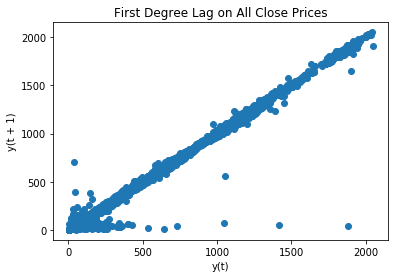

In [17]:
#Positive autocorrelation on all close prices in the dataset
lag_plot(data.close, lag=1)
plt.title('First Degree Lag on All Close Prices')

Text(0.5,1,'Third Degree Lag on All Close Prices')

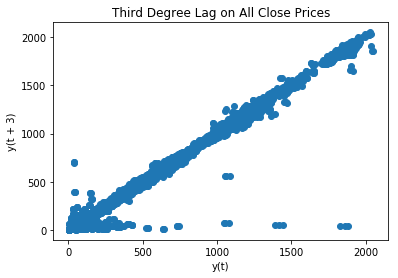

In [18]:
#Third degree lag on all close
lag_plot(data.close, lag=3)
plt.title('Third Degree Lag on All Close Prices')

Text(0.5,1,'First Degree Lag on All Open Prices')

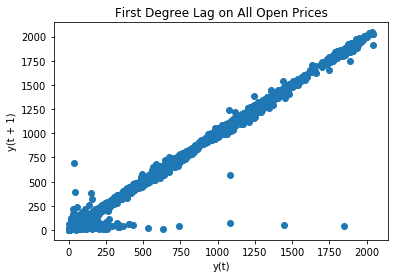

In [19]:
#Positive autocorrelation on all open prices in the dataset
lag_plot(data.open, lag=1)
plt.title('First Degree Lag on All Open Prices')

Text(0.5,1,'Third Degree Lag on All Close Prices')

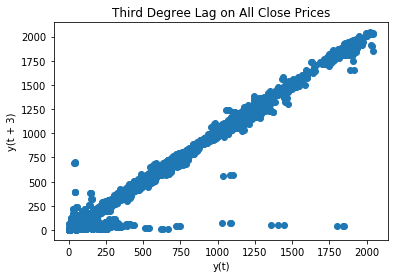

In [20]:
#Third degree lag on all open
lag_plot(data.open, lag=3)
plt.title('Third Degree Lag on All Close Prices')

Text(0.5,1,'First Degree Lag on All Volumes')

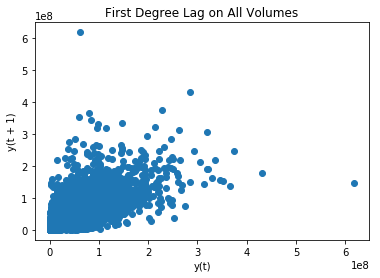

In [21]:
#Lag plot of all volume, very random
lag_plot(data.volume, lag=1)
plt.title('First Degree Lag on All Volumes')

Text(0.5,1,'Third Degree Lag on All Volumes')

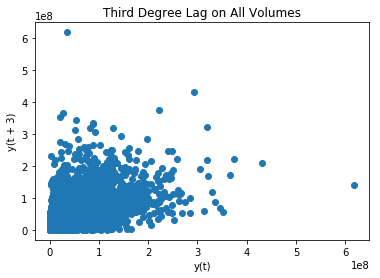

In [22]:
#Third degree lag on all volume
lag_plot(data.volume, lag=3)
plt.title('Third Degree Lag on All Volumes')

In [23]:
#List of all stocks
stock_symbols = []
for name in data.Name:
    if name not in stock_symbols:
        stock_symbols.append(name)
#Alternatively
stock_names = data.Name.unique()

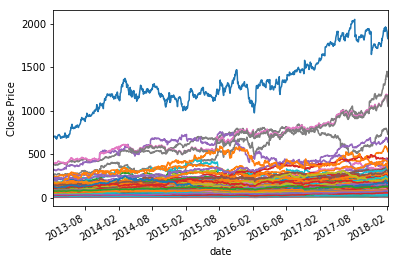

In [24]:
#Close prices of all stocks on one plot
for stock in stock_symbols:
    data[data['Name'] == stock].close.plot()
    plt.ylabel("Close Price")

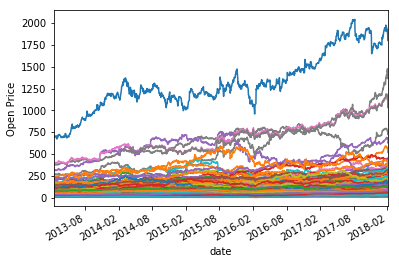

In [25]:
#Open prices of all stocks on one plot
for stock in stock_symbols:
    data[data['Name'] == stock].open.plot()
    plt.ylabel("Open Price")

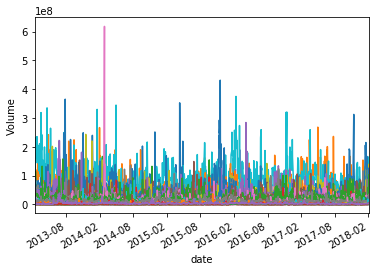

In [26]:
#Volume of all stocks on one plot
for stock in stock_symbols:
    data[data['Name'] == stock].volume.plot()
    plt.ylabel("Volume")

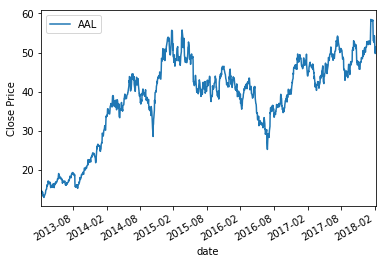

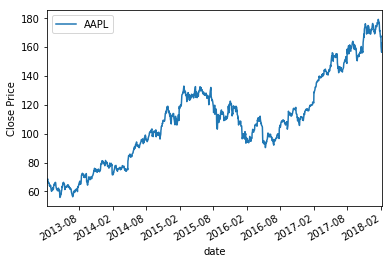

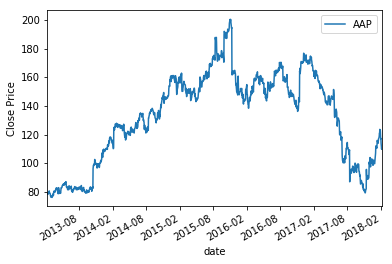

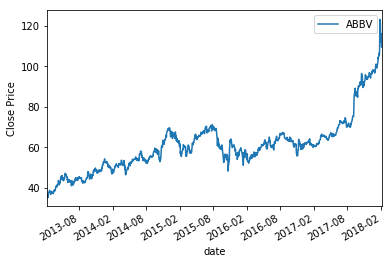

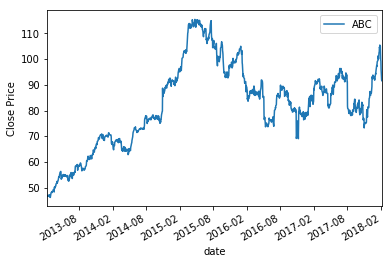

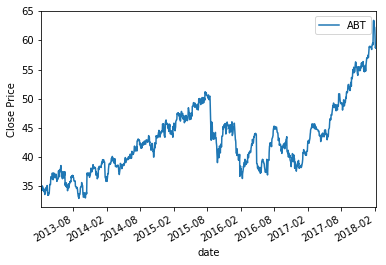

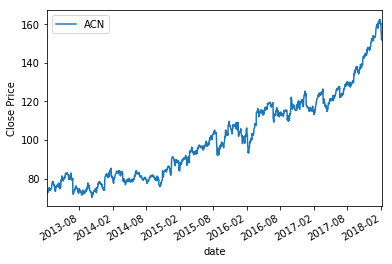

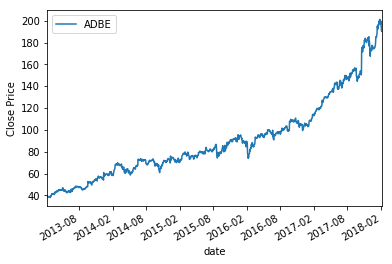

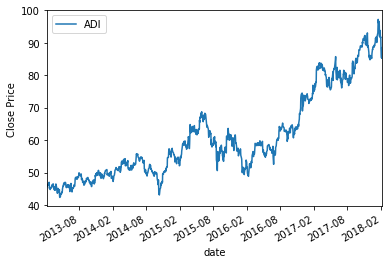

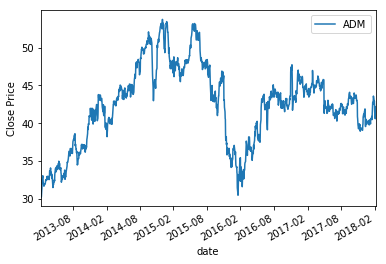

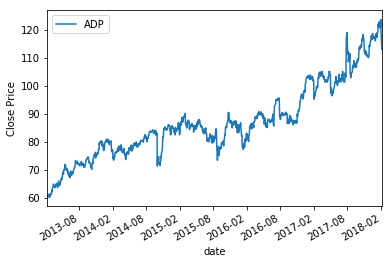

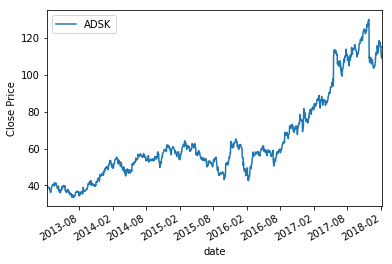

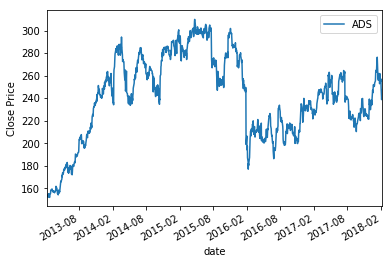

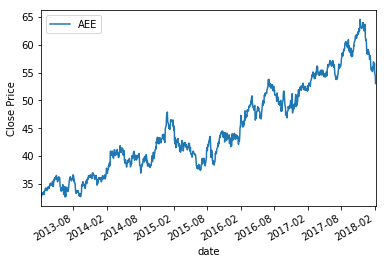

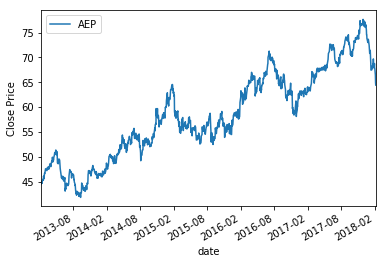

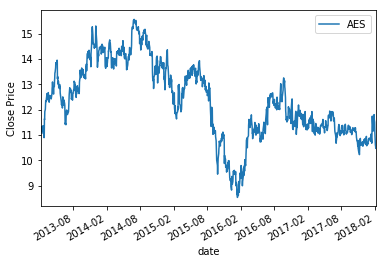

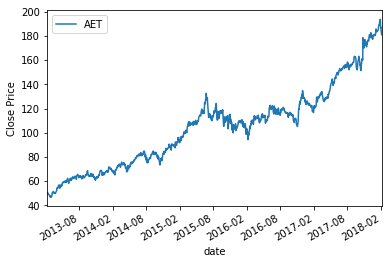

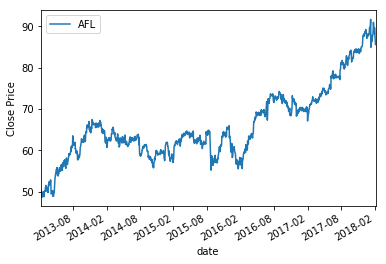

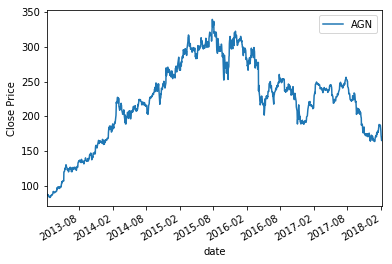

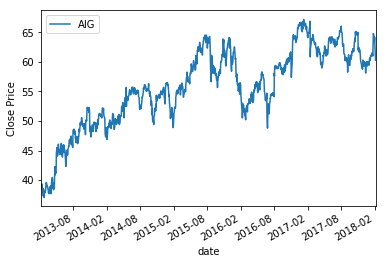

In [27]:
#First 20 stocks, plots of closing prices throughout time
for stock in stock_symbols[0:20]:
    plt.figure()
    data[data['Name'] ==  stock].close.plot(label=stock)
    plt.legend(loc='best')
    plt.ylabel("Close Price")
    plt.show()
    

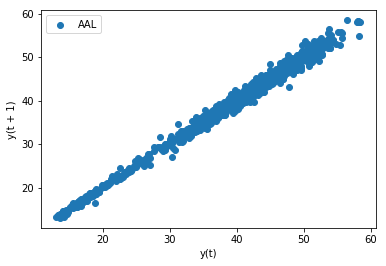

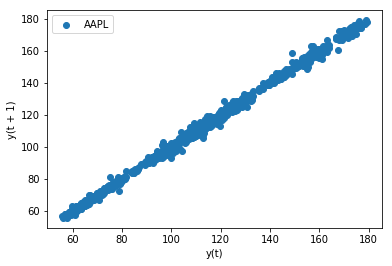

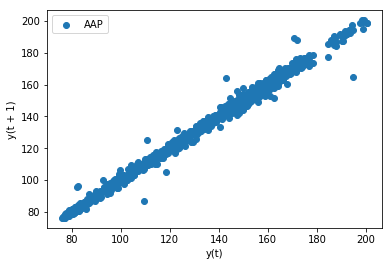

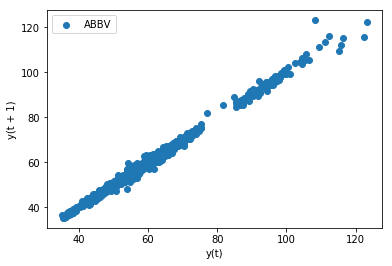

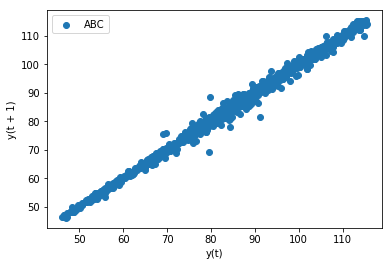

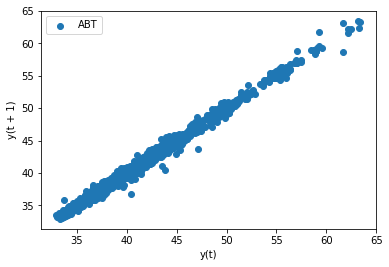

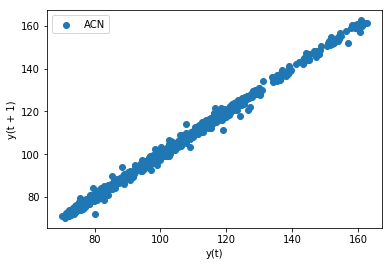

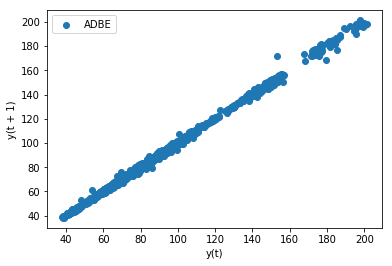

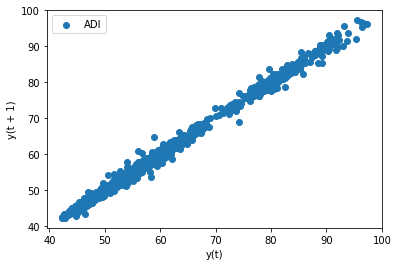

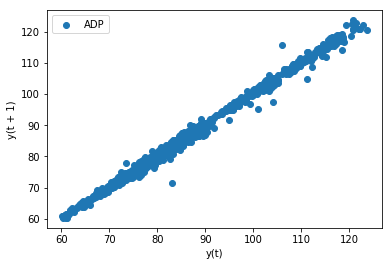

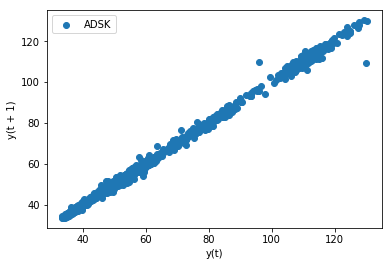

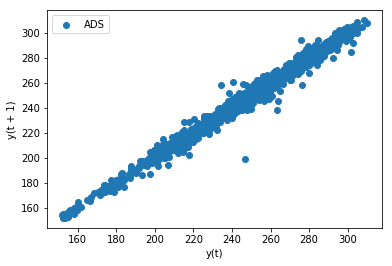

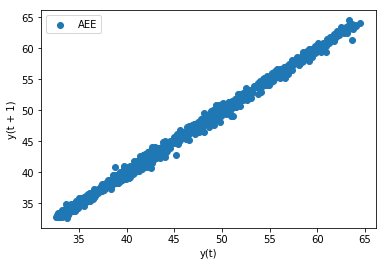

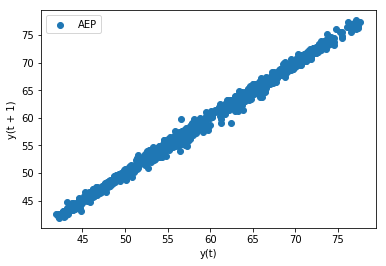

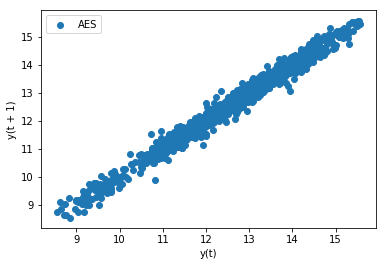

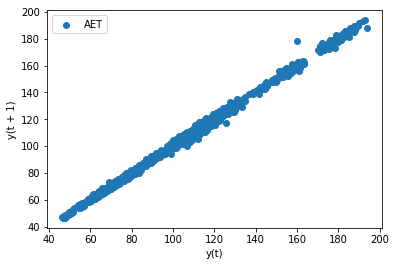

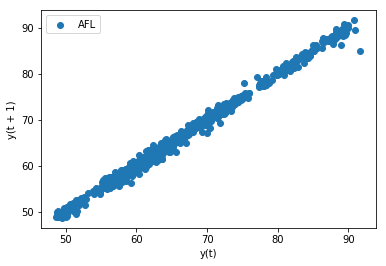

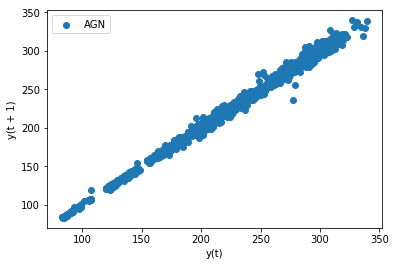

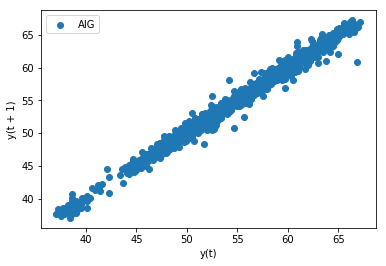

In [28]:
#First 20 stocks, plots of closing prices throughout time
for stock in stock_symbols[0:20]:
    plt.figure()
    lag_plot(data[data['Name'] == stock].close, label = stock)
    plt.legend(loc='best')

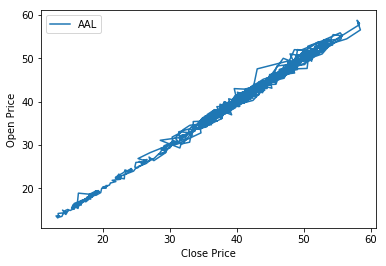

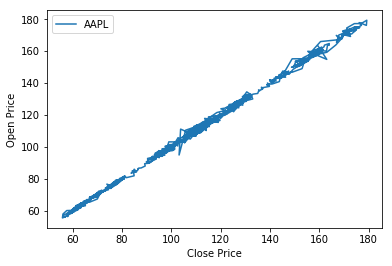

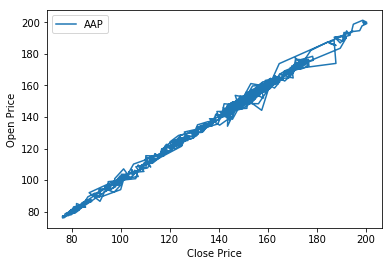

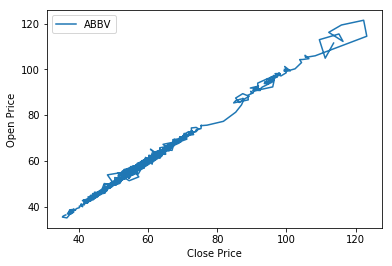

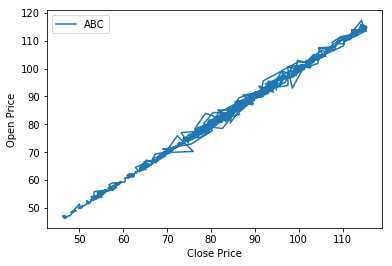

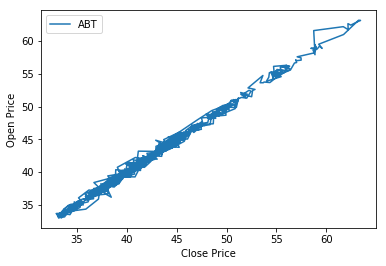

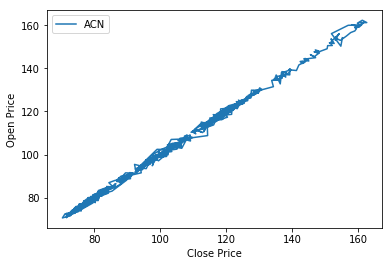

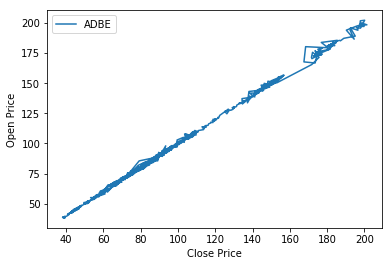

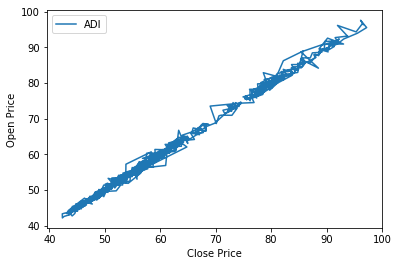

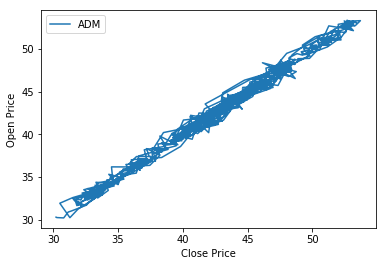

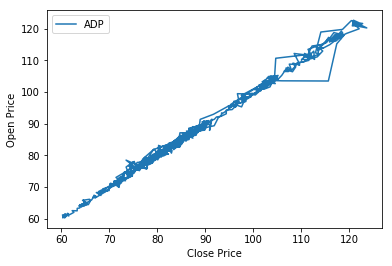

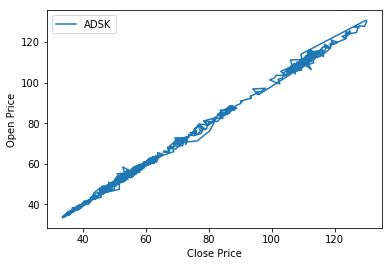

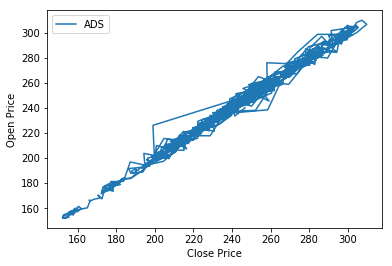

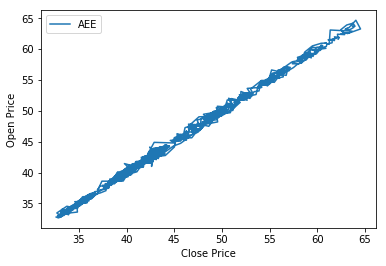

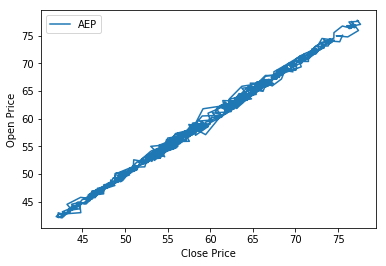

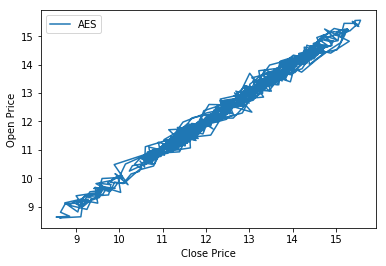

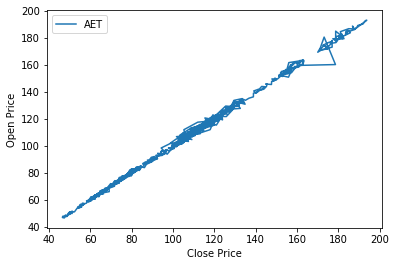

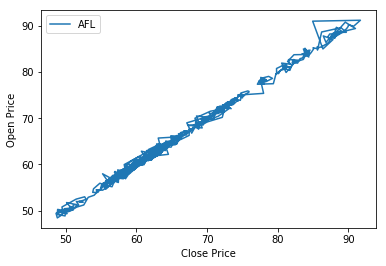

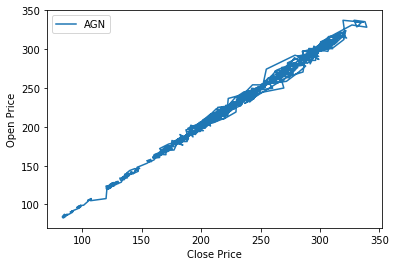

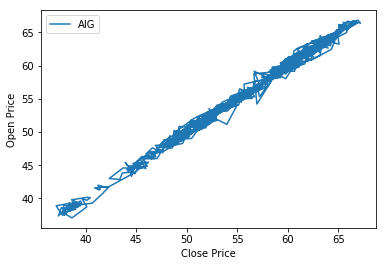

In [29]:
#Plots of close vs open for the first 20 stocks
for stock in stock_symbols[0:20]:
    x = data[data['Name'] == stock].close.values
    y = data[data['Name'] == stock].open.values
    plt.figure()
    plt.plot(x,y, label=stock)
    plt.xlabel('Close Price')
    plt.ylabel('Open Price')
    plt.legend(loc='best')    

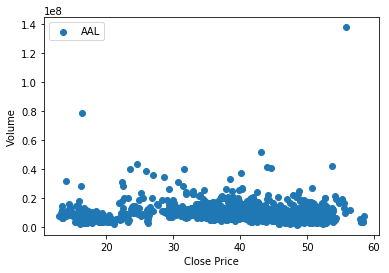

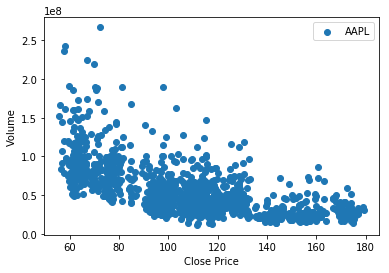

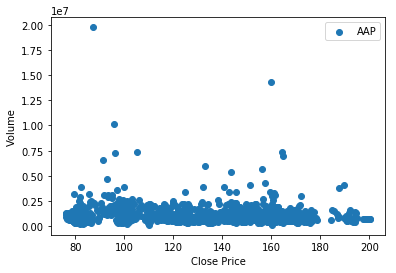

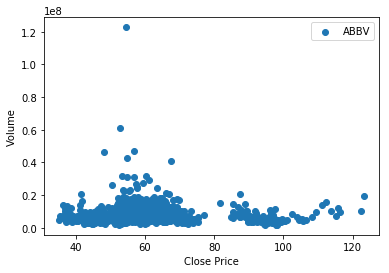

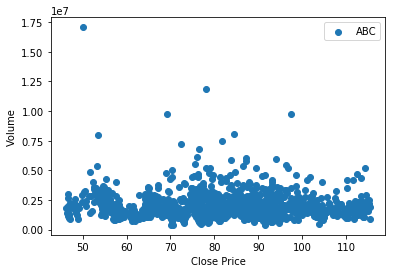

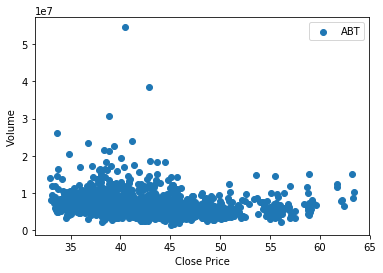

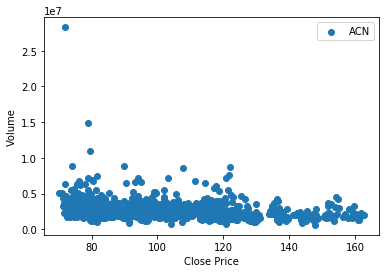

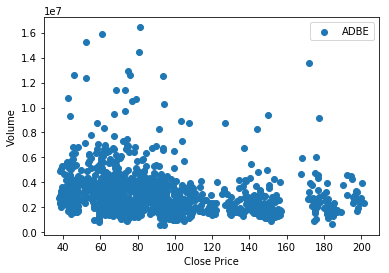

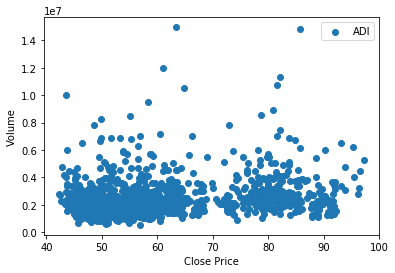

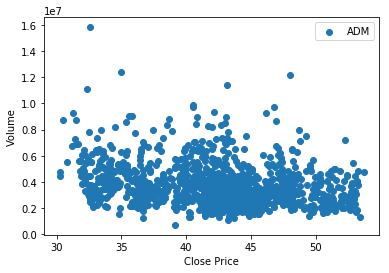

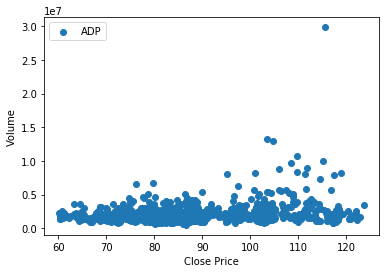

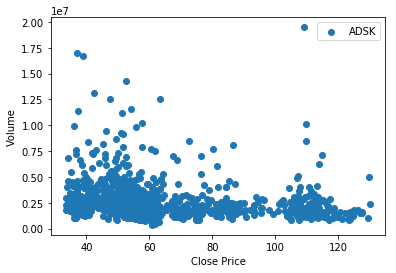

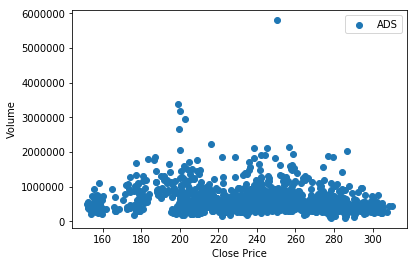

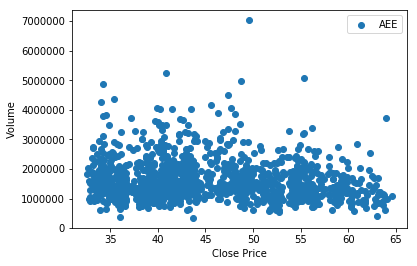

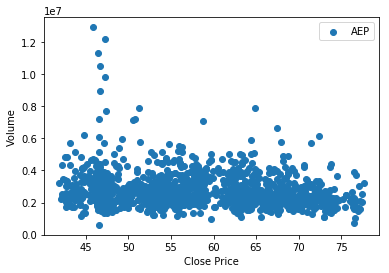

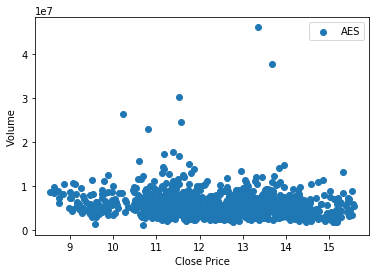

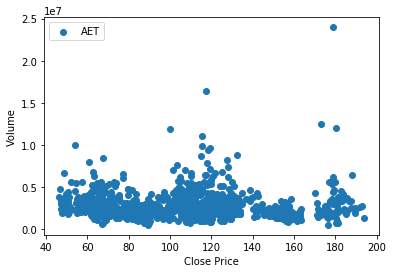

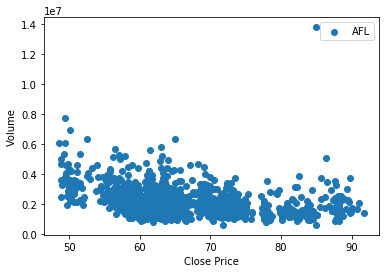

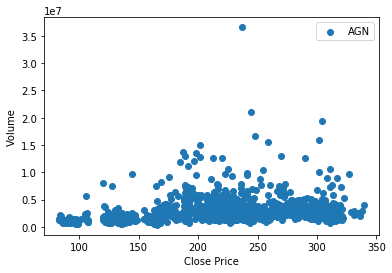

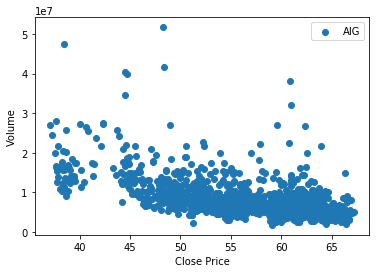

In [30]:
#Plots of close vs volume for the first 20 stocks
for stock in stock_symbols[0:20]:
    x = data[data['Name'] == stock].close.values
    y = data[data['Name'] == stock].volume.values
    plt.figure()
    plt.scatter(x,y, label=stock)
    plt.xlabel('Close Price')
    plt.ylabel('Volume')
    plt.legend(loc='best')   

In [31]:
#List of all stocks grouped by name
#About 1259 entries for most stocks
list(data.groupby('Name'))


[('A',              open    high     low  close    volume Name
  date                                                   
  2013-02-08  45.07  45.350  45.000  45.08   1824755    A
  2013-02-11  45.17  45.180  44.450  44.60   2915405    A
  2013-02-12  44.81  44.950  44.500  44.62   2373731    A
  2013-02-13  44.81  45.240  44.680  44.75   2052338    A
  2013-02-14  44.72  44.780  44.360  44.58   3826245    A
  2013-02-15  43.48  44.240  42.210  42.25  14657315    A
  2013-02-19  42.21  43.120  42.210  43.01   4116141    A
  2013-02-20  42.84  42.850  42.225  42.24   3873183    A
  2013-02-21  42.14  42.140  41.470  41.63   3415149    A
  2013-02-22  41.83  42.070  41.580  41.80   3354862    A
  2013-02-25  42.09  42.220  41.290  41.29   3622460    A
  2013-02-26  40.62  41.290  40.190  40.97   6185811    A
  2013-02-27  40.99  41.905  40.830  41.73   3564385    A
  2013-02-28  41.78  42.060  41.450  41.48   3464202    A
  2013-03-01  41.18  41.980  40.730  41.93   3089323    A
  2013-03

In [ ]:
# #Mean closing prices grouped by stock and sorted
# data.groupby('Name').close.mean().sort_values(ascending = False)

In [ ]:
# data.groupby('Name').agg({'open': [max, min, 'mean', 'median'],
#                           'high': [max, min, 'mean', 'median'],
#                           'low': [max, min, 'mean', 'median'],
#                           'close': [max, min, 'mean', 'median'],
#                           'volume': [max, min, 'mean', 'median']})

In [ ]:
#2013 close data
list(data['2013'].groupby('Name').close)


In [ ]:
#2014 close data
list(data['2014'].groupby('Name').close)

In [ ]:
#2015 close data
list(data['2015'].groupby('Name').close)

In [ ]:
#2016 close data
list(data['2016'].groupby('Name').close)

In [ ]:
#2017 close data
list(data['2017'].groupby('Name').close)

In [ ]:
#2018 close data
list(data['2018'].groupby('Name').close)

In [ ]:
data["12/01/2015":"01/01/2016"].groupby('Name').close.plot()

In [ ]:
data["12/01/2015": "01/01/2017"]

In [ ]:
#Padding the data by forward propagating
#Only testing on AAPL
aapl_data = data[data.Name=='AAPL'].asfreq('D', method='pad')

In [ ]:
aapl_data

In [ ]:
#Percent change plot of AAPL throughout 2017
aapl_data["01/01/2017":"12/31/2017"].close.pct_change().plot()

In [ ]:
data[data.Name == 'AAPL']["2017"].close.plot()

In [ ]:
data[data.Name == 'AAPL']["2016"].close.plot()

In [ ]:
data[data.Name == 'AAPL']["2015"].close.plot()

In [ ]:
data[data.Name == 'AAPL']["2014"].close.plot()

In [ ]:
data[data['Name'] == 'AAPL'].close.pct_change()

In [32]:
#Plot of SO stock percent change overlayed on S&P percent change
#Percent change = (close-open)/(open)


#x_values = []
#y_values = []

#percent_change_market = list(((close_price-open_price)/open_price).items())
#percent_change_sp = list(((sp_close_price - sp_open_price)/sp_open_price).items())

#for i in range(len(percent_change_market)):
    #x_values.append(percent_change_market[i][1])

#for i in range(len(percent_change_sp)):
    #y_values.append(percent_change_sp[i][1])
    
close_price = data[data['Name'] == 'SO']['2014'].close
open_price = data[data['Name'] == 'SO']['2014'].open

sp_close_price = sp_data.Close['2014']
sp_open_price = sp_data.Open['2014']

((close_price-open_price)/open_price).plot(label = 'SO', figsize = (8,8))

((sp_close_price - sp_open_price)/sp_open_price).plot(label = 'S&P')

plt.legend(loc='best')